## Members:

| S.No      | Name | Roll No     |
| :---:        |    :----:   |          :---: |
| 1.      | Keshav S       | CB.EN.U4CSE20327   |
| 2.   | Raj Mota        | CB.EN.U4CSE20349      |
| 3.      | Sai Sidharth Sriram       | CB.EN.U4CSE20352   |
| 4.   | Sanjith Raghav S      | CB.EN.U4CSE20355      |
| 5.   | Tarun Rajkumar       | CB.EN.U4CSE20365      |

In [324]:
#Base Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Splitting the Dataset into Test and Train
from sklearn.model_selection import train_test_split

#Encoding the Ordinal Data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#ML Models
#Decision Tree
from sklearn import tree
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#KNN
from sklearn.neighbors import KNeighborsClassifier 
#Naive Bayes
from sklearn.naive_bayes import GaussianNB 
# SVM
from sklearn.svm import SVC
# K Means
from sklearn.cluster import KMeans

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neural_network import MLPClassifier

#Initializing the Classifiers
#Logisitc Regression
d_tree_classifier = tree.DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
gaussianNB_classifier = GaussianNB()  
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski') 
logistic_classifier =LogisticRegression(solver='lbfgs', max_iter=1000)

#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

#Plotting Decision Tree and Random Forest
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


### Attribute Information

### About the Data

-----------------------------------------------------------------------------------------------------------------------------

In [161]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Basic Analysis of the Data

In [162]:
print("Dimensions of the Dataset: ",df.shape)
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Dimensions of the Dataset:  (5110, 12)
Number of Rows:  5110
Number of Columns:  12


In [163]:
print("Dataset Info: \n")
df.info()

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [164]:
print("5 Number Summary about the data - Includes only Numerical Data: \n")
df.describe()

5 Number Summary about the data - Includes only Numerical Data: 



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [165]:
print("Description of Categorical Data: \n")
df.astype('object').describe().transpose()

Description of Categorical Data: 



,count,unique,top,freq
id,5110,5110,9046,1
gender,5110,3,Female,2994
age,5110.0,104.0,78.0,102.0
hypertension,5110,2,0,4612
heart_disease,5110,2,0,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
avg_glucose_level,5110.0,3979.0,93.88,6.0
bmi,4909.0,418.0,28.7,41.0


In [166]:
print("Checking the number of NaN values column wise: \n")
df.isna().sum()

Checking the number of NaN values column wise: 



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Data Prepossessing

In [167]:
#Dealing with NaN values in the BMI Column
print("Mean: ", df['bmi'].mean())
print("Median: ", df['bmi'].median())
#Choosing the Mean to replace NaN values
median = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(value=median)
df.isna().sum()

Mean:  28.893236911794673
Median:  28.1


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [168]:
#The ID Column is found to be no importance when passing the data to the ML Model and predicting data
#Hence we remove this column
df = df.drop(['id'], axis=1)

In [169]:
#Age Column has float values so we remove those values
df['age'] = df['age'].astype('int')

#Gender has one anomoly data with Other as the Gender so we remove them
df = df[df['gender'] != 'Other']

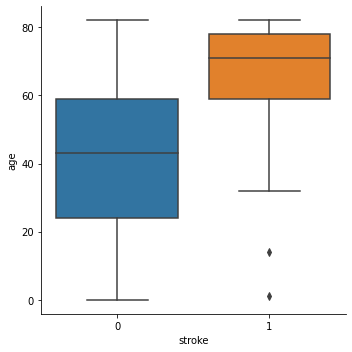

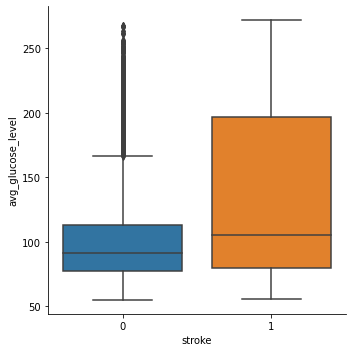

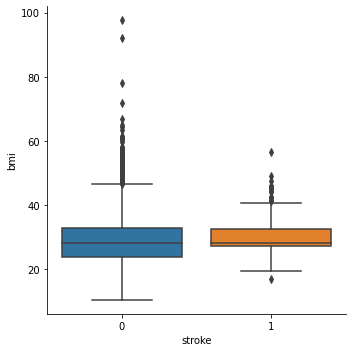

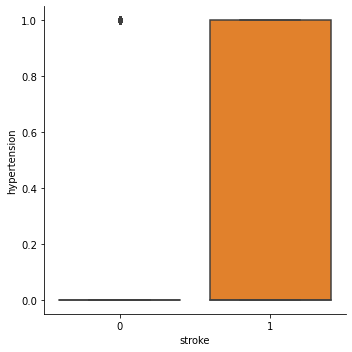

In [170]:
#Outlier Analysis using BoxPlot
#sns.catplot -> Used for Categorical Data
sns.catplot(data=df, x="stroke", y="age", kind="box")
sns.catplot(data=df, x="stroke", y="avg_glucose_level", kind="box")
sns.catplot(data=df, x="stroke", y="bmi", kind="box")
sns.catplot(data=df, x='stroke', y='hypertension', kind='box')

##### Removing the Outliers

In [171]:
#Deleting Outliers in Age Column
indexAge = df[((df['age'] < 20) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

In [172]:
#Deleting Outliers in Avg Glucose Level Column
indexAge = df[((df['avg_glucose_level'] > 220) & (df['stroke'] == 0))].index
df.drop(indexAge, inplace=True)

In [173]:
#Deleting Outliers in BMI Column
indexAge = df[((df['bmi'] > 50) & (df['stroke'] == 0))].index
df.drop(indexAge, inplace=True)


indexAge = df[((df['bmi'] > 40) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

indexAge = df[((df['bmi'] < 19) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

In [174]:
#Creating a Copy of the DataFrame for later use
df_copy = df.copy()

In [175]:
#Checking the Dataset info and 5 Number Summary after removing Outliers

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4838 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4838 non-null   object 
 1   age                4838 non-null   int32  
 2   hypertension       4838 non-null   int64  
 3   heart_disease      4838 non-null   int64  
 4   ever_married       4838 non-null   object 
 5   work_type          4838 non-null   object 
 6   Residence_type     4838 non-null   object 
 7   avg_glucose_level  4838 non-null   float64
 8   bmi                4838 non-null   float64
 9   smoking_status     4838 non-null   object 
 10  stroke             4838 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 434.7+ KB


In [177]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000
mean,42.457214,0.089706,0.051054,101.096263,28.231749,0.047127
std,22.716310,0.285790,0.220131,38.169299,6.778789,0.211932
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,24.000000,0.000000,0.000000,76.572500,23.500000,0.000000
50%,44.000000,0.000000,0.000000,90.600000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,111.035000,32.300000,0.000000
max,82.000000,1.000000,1.000000,271.740000,49.900000,1.000000


### Feature Processing - Encoding the Data

In [178]:
#Encoding the Categorical Data 
#Using Label Encoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.6,1,1
1,0,61,0,0,1,3,0,202.21,28.1,2,1
2,1,80,0,1,1,2,0,105.92,32.5,2,1
3,0,49,0,0,1,2,1,171.23,34.4,3,1
4,0,79,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83.75,28.1,2,0
5106,0,81,0,0,1,3,1,125.20,40.0,2,0
5107,0,35,0,0,1,3,0,82.99,30.6,2,0
5108,1,51,0,0,1,2,0,166.29,25.6,1,0


### Modelling the Data

In [179]:
X = df.drop(['stroke'],axis=1)
Y = df['stroke'].to_frame()

In [412]:
sum(Y['stroke'] == 1)

228

In [180]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=41)
X_sample, Y_sample = sm.fit_resample(X,Y)

In [411]:
Y_sample.size

9220

In [410]:
Y_sample.nunique

<bound method DataFrame.nunique of       stroke
0          1
1          1
2          1
3          1
4          1
...      ...
9215       1
9216       1
9217       1
9218       1
9219       1

[9220 rows x 1 columns]>

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample, test_size=0.3 , random_state=9)

In [182]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Normalizing the Data because if the values are too far split, then the Model tends to overfit

## Implementing Various Classification Models

1. Decision Tree
2. Random Forest
3. KNN - Kth Nearest Neighbour
4. Naive Bayes
5. Logistic Regression

### 1. Decision Tree

In [205]:
d_tree_classifier.fit(X_train,Y_train.values.ravel())

DecisionTreeClassifier()

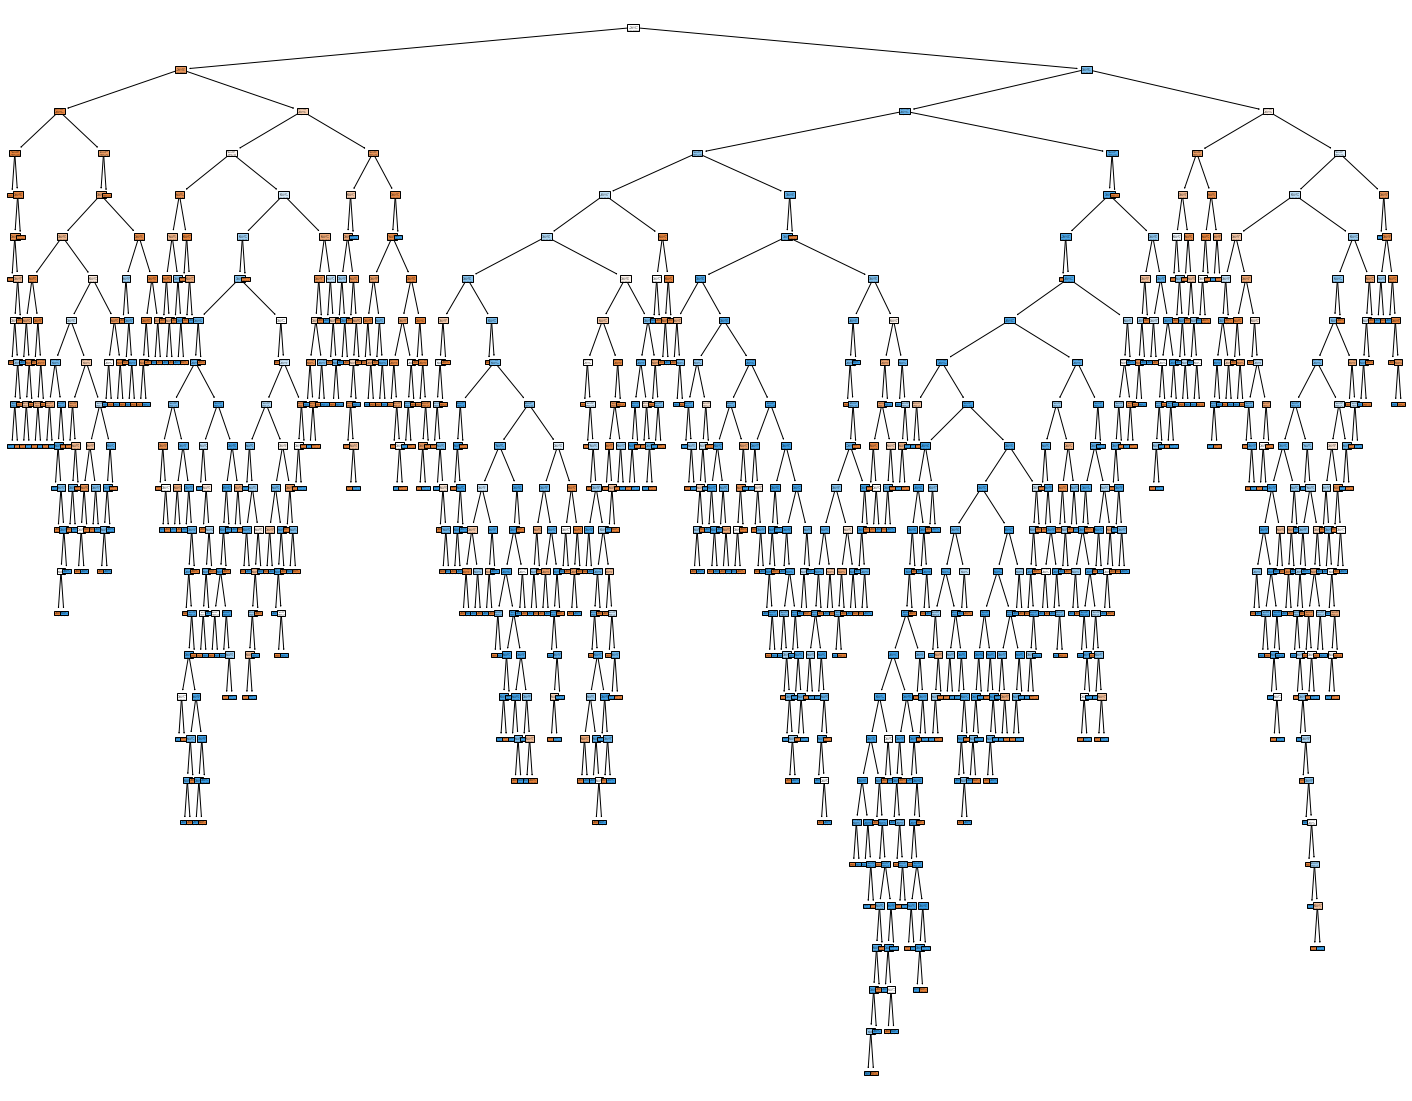

'\nEntropy -  Measure of Randomness\nEntropy(target, column) = Prob(attr1) * Entropy(Yes/No) + Prob(attr2) * Entropy(Yes/No)... -> for that attri\nEntropy(Yes/No) = Entropy(Yes) + Entropy(No)\nEntropy(Yes) = -P(yes) * log(P(yes))\n\nInformation Gain - Shows how valuable a column is to getting a prediction\nRoot Node - Max(Information Gain)\n\nInformation Gain = Entropy(Target) - Entropy(Target, Column)\n'

In [206]:
Y_pred_dt = d_tree_classifier.predict(X_test)
plt_1 = plt.figure(figsize=(25, 20))
plot_tree(d_tree_classifier,filled=True)
plt.show()
plt_1.savefig('Decision_Tree.png')

'''
Entropy -  Measure of Randomness
Entropy(target, column) = Prob(attr1) * Entropy(Yes/No) + Prob(attr2) * Entropy(Yes/No)... -> for that attri
Entropy(Yes/No) = Entropy(Yes) + Entropy(No)
Entropy(Yes) = -P(yes) * log(P(yes))

Information Gain - Shows how valuable a column is to getting a prediction
Root Node - Max(Information Gain)

Information Gain = Entropy(Target) - Entropy(Target, Column)
'''

### Evaluation Metrics

#### Confusion Matrix

Confusion Matrix for Decision Tree: 
 [[1256  126]
 [  89 1295]]


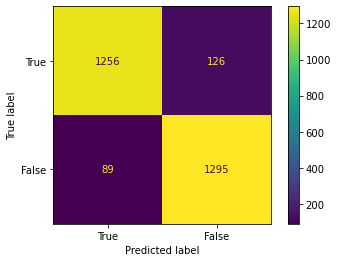

In [207]:
confu_mat_dTree = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix for Decision Tree: \n",confu_mat_dTree)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_dTree, display_labels=[True, False])
confu_mat_visualize.plot()

In [403]:
accscore.append(accuracy_score(Y_pred_dt,Y_test))

In [208]:
print('Accuracy Score :',accuracy_score(Y_pred_dt,Y_test))
print('Precision Score :',precision_score(Y_pred_dt, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_dt,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_dt, Y_test, average='weighted'))

Accuracy Score : 0.9222704266088214
Precision Score : 0.9226298035663887
Recall score : 0.9222704266088214
F1_Score : 0.9222850900064559


### 2. Random Forest

In [209]:
rf_classifier.fit(X_train,Y_train.values.ravel())

RandomForestClassifier()

In [210]:
Y_pred_rf = rf_classifier.predict(X_test)

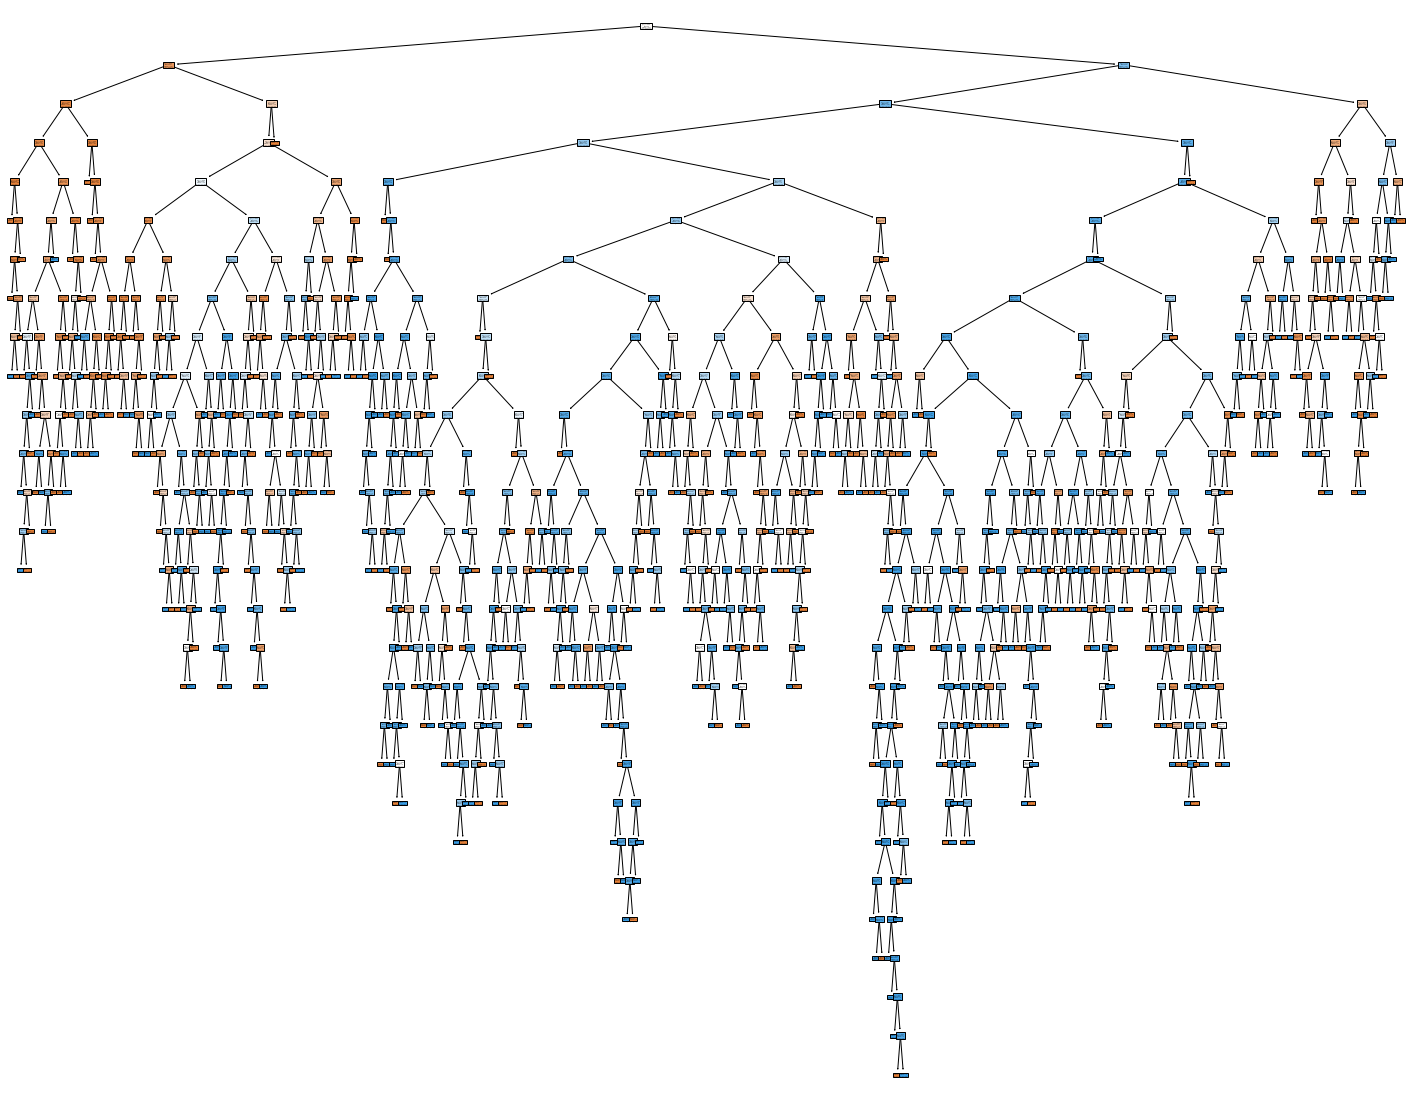

In [211]:
plt_1 = plt.figure(figsize=(25, 20))
tree.plot_tree(rf_classifier.estimators_[5],filled=True)
plt.show()

Confusion Matrix for Random Forest: 
 [[1281  101]
 [  47 1337]]


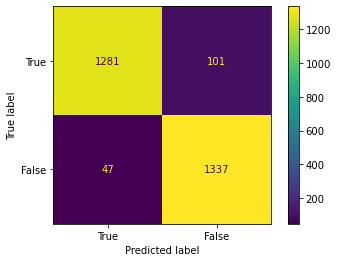

In [212]:
confu_mat_randomForest = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix for Random Forest: \n",confu_mat_randomForest)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_randomForest, display_labels=[True, False])
confu_mat_visualize.plot()

In [367]:
accscore.append(accuracy_score(Y_pred_rf,Y_test))

In [213]:
print('Accuracy Score :',accuracy_score(Y_pred_rf,Y_test))
print('Precision Score :',precision_score(Y_pred_rf, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_rf,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_rf, Y_test, average='weighted'))

Accuracy Score : 0.9464931308749096
Precision Score : 0.9472569195173505
Recall score : 0.9464931308749096
F1_Score : 0.946514288407872


### 3. Naive Bayes

In [39]:
'''
P(y|x) = P(x|y) * P(y)/ P(x)
'''

'\nP(y|x) = P(x|y) * P(y)/ P(x)\n'

In [215]:
gaussianNB_classifier.fit(X_train,Y_train.values.ravel())
Y_pred_nb = gaussianNB_classifier.predict(X_test)

In [216]:
df_nb = pd.DataFrame({"Y_Pre":Y_pred_nb, "Y_Actual":Y_test.values.ravel()})
df_nb

,Y_Pre,Y_Actual
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
2761,0,0
2762,1,1
2763,0,0
2764,0,0


### Evaluation Metrics

##### Confusion Matrix

Confusion Matrix for Naive Bayes: 
 [[1051  331]
 [ 206 1178]]


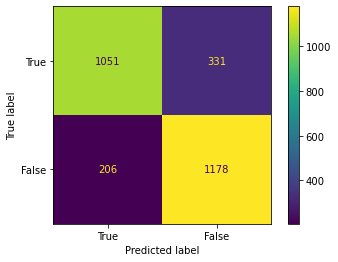

In [217]:
confu_mat_Naive = confusion_matrix(Y_test, Y_pred_nb)  
print("Confusion Matrix for Naive Bayes: \n",confu_mat_Naive)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_Naive, display_labels=[True, False])
confu_mat_visualize.plot()

In [368]:
accscore.append(accuracy_score(Y_pred_nb,Y_test))

In [218]:
print('Accuracy Score :',accuracy_score(Y_pred_nb,Y_test))
print('Precision Score :',precision_score(Y_pred_nb, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_nb,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_nb, Y_test, average='weighted'))

Accuracy Score : 0.8058568329718004
Precision Score : 0.8099540866252339
Recall score : 0.8058568329718004
F1_Score : 0.8062605229983824


### 4. KNN

In [219]:
error_rate=[]
for i in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors=i) 
    knn_classifier.fit(X_train,Y_train.values.ravel())
    pred_i = knn_classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test.values.ravel()))

Text(0, 0.5, 'Error')

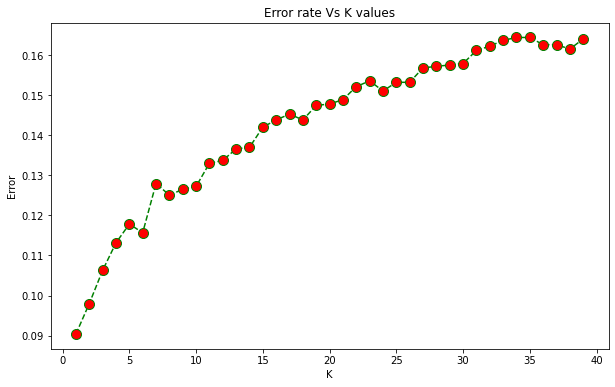

In [220]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate Vs K values')
plt.xlabel('K')
plt.ylabel('Error')

In [221]:
#.values converts the data to a 1D array and .ravel() flattens it
knn_classifier.fit(X_train,Y_train.values.ravel())  
Y_pred_knn = knn_classifier.predict(X_test) 

In [222]:
df_knn = pd.DataFrame({"Y_Pre":Y_pred_knn, "Y_Actual":Y_test.values.ravel()})
df_knn

,Y_Pre,Y_Actual
0,0,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
2761,0,0
2762,1,1
2763,0,0
2764,0,0


### Evaluation Metrics

##### Confusion Matrix

Confusion Matrix for KNN: 
 [[1068  314]
 [ 140 1244]]


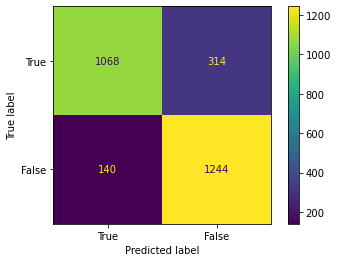

In [223]:
confu_mat_KNN = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix for KNN: \n",confu_mat_KNN)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_KNN, display_labels=[True, False])
confu_mat_visualize.plot()

In [369]:
accscore.append(accuracy_score(Y_pred_knn,Y_test))

In [224]:
print('Accuracy Score :',accuracy_score(Y_pred_knn,Y_test))
print('Precision Score :',precision_score(Y_pred_knn, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_knn,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_knn, Y_test, average='weighted'))

Accuracy Score : 0.8358640636297903
Precision Score : 0.843793511429394
Recall score : 0.8358640636297903
F1_Score : 0.8365237282021797


### Logistic Regression

In [225]:
logistic_classifier.fit(X_train,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [226]:
Y_pred_logistic = logistic_classifier.predict(X_test)

### Evaluation Metrics

#### Confusion Matrix

Confusion Matrix for Logistic Regression: 
 [[1096  286]
 [ 250 1134]]


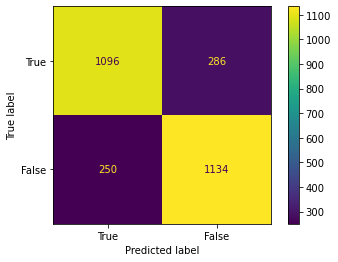

In [227]:
confu_mat_log = confusion_matrix(Y_test,Y_pred_logistic)
print("Confusion Matrix for Logistic Regression: \n",confu_mat_log)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_log, display_labels=[True, False])
confu_mat_visualize.plot()

In [370]:
accscore.append(accuracy_score(Y_pred_logistic,Y_test))

In [228]:
print('Accuracy Score :',accuracy_score(Y_pred_logistic,Y_test))
print('Precision Score :',precision_score(Y_pred_logistic, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_logistic,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_logistic, Y_test, average='weighted'))

Accuracy Score : 0.8062183658712943
Precision Score : 0.8065608033931633
Recall score : 0.8062183658712943
F1_Score : 0.8062530217038042


### SVM

In [229]:
svm = SVC()

In [230]:
svm.fit(X_train,Y_train.values.ravel())

SVC()

In [231]:
y_pred_svm = svm.predict(X_test)

Confusion Matrix for Logistic Regression: 
 [[1144  238]
 [ 148 1236]]


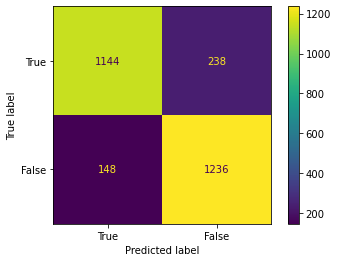

In [232]:
confu_mat_svm = confusion_matrix(Y_test, y_pred_svm)
print("Confusion Matrix for Logistic Regression: \n", confu_mat_svm)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_svm, display_labels=[True, False])
confu_mat_visualize.plot()

In [372]:
accscore.append(accuracy_score(y_pred_svm,Y_test))

In [233]:
print('Accuracy Score :',accuracy_score(y_pred_svm,Y_test))
print('Precision Score :',precision_score(y_pred_svm, Y_test, average='weighted'))
print('Recall score :',recall_score(y_pred_svm,Y_test, average='weighted'))
print('F1_Score :',f1_score(y_pred_svm, Y_test, average='weighted'))

Accuracy Score : 0.8604483007953724
Precision Score : 0.8625723062018623
Recall score : 0.8604483007953724
F1_Score : 0.8605994973303143


### K - Means Clustering

In [239]:
kmeans = KMeans(n_clusters = 2)

In [240]:
y_pred_kmeans = kmeans.fit_predict(X_sample)

In [374]:
accscore.append(accuracy_score(y_pred_kmeans,Y_sample))

In [241]:
print('Accuracy Score :',accuracy_score(y_pred_kmeans,Y_sample))
print('Precision Score :',precision_score(y_pred_kmeans, Y_sample, average='weighted'))
print('Recall score :',recall_score(y_pred_kmeans,Y_sample, average='weighted'))
print('F1_Score :',f1_score(y_pred_kmeans, Y_sample, average='weighted'))

Accuracy Score : 0.37787418655097615
Precision Score : 0.5342371812667924
Recall score : 0.37787418655097615
F1_Score : 0.43063807391171394


# Dimensionality Reduction

In [243]:
scaler = StandardScaler()
scaler.fit(X)

scaled_data = scaler.transform(X)

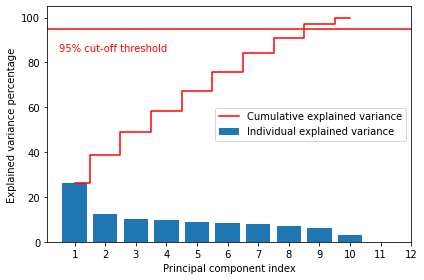

In [244]:
pca = PCA(n_components=None)
pca.fit(scaled_data)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 11), exp_var, align='center',label='Individual explained variance')

plt.step(range(1, 11), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.5, 85, '95% cut-off threshold', color='red', fontsize=10)
plt.legend(loc='best')
plt.tight_layout()

In [245]:
#Maximum variance is taken because there should be maximum spread among the data
pca_n = PCA(n_components=0.95)
pca_n.fit(scaled_data)
n_pca = pca_n.transform(scaled_data)

In [246]:
pca_n.n_components_

9

## Using the models on the new table

In [247]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=43)
X_sample_pca, y_sample_pca = sm.fit_resample(n_pca, Y)

In [248]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_sample_pca, y_sample_pca, test_size=0.3 , random_state=10)

## Decision Tree

In [249]:
criteria = ['gini','entropy']
maxdepth = np.arange(1,21,1)
maxleafnodes = np.arange(3,50,1)

d_tree_grid = dict(criterion = criteria,max_depth = maxdepth,max_leaf_nodes=maxleafnodes)

In [250]:
d_tree_classifier1 = tree.DecisionTreeClassifier()

In [251]:
d_tree_classifier1.fit(X_train1, Y_train1.values.ravel())

DecisionTreeClassifier()

In [252]:
grid = GridSearchCV(estimator=d_tree_classifier1, param_grid=d_tree_grid,n_jobs=-1,cv=4)

In [253]:
grid.fit(X_train1, Y_train1.values.ravel())

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'max_leaf_nodes': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [254]:
Y_pred_dt1 = d_tree_classifier1.predict(X_test1)

In [375]:
pcascore.append(accuracy_score(Y_pred_dt1,Y_test1))
tunepcascore.append(grid.best_score_)

In [258]:
print('Accuracy Score :',accuracy_score(Y_pred_dt1,Y_test1))
print('Precision Score :',precision_score(Y_pred_dt1, Y_test1, average='weighted'))
print('Recall score :',recall_score(Y_pred_dt1,Y_test1, average='weighted'))
print('F1_Score :',f1_score(Y_pred_dt1, Y_test1, average='weighted'))

Accuracy Score : 0.8940708604483008
Precision Score : 0.894709371114448
Recall score : 0.8940708604483008
F1_Score : 0.8941095475768993


In [259]:
print("Grid Optimal parameters %s Accuracy score of  %0.6f"% (grid.best_params_, grid.best_score_))

Grid Optimal parameters {'criterion': 'gini', 'max_depth': 13, 'max_leaf_nodes': 47} Accuracy score of  0.844592


### Random Forest

In [113]:
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,100,1)
criteria = ['gini','entropy']
maxleafnodes = np.arange(3,50,1)

In [115]:
rf_classifier1 = RandomForestClassifier()

In [116]:
rf_classifier1.fit(X_train1, Y_train1.values.ravel())

RandomForestClassifier()

In [117]:
rf_grid = dict(max_features=max_features_range,n_estimators=n_estimators_range,criterion = criteria, max_leaf_nodes = maxleafnodes)

In [118]:
grid1 = GridSearchCV(estimator=rf_classifier1, param_grid=rf_grid, cv=3,n_jobs=-1)

In [119]:
grid1.fit(X_train1, Y_train1.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'max_leaf_nodes': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [120]:
Y_pred_rf1 = rf_classifier1.predict(X_test1)

In [ ]:
pcascore.append(accuracy_score(Y_pred_rf1,Y_test1))
tunepcascore.append(grid1.best_score_)

In [121]:
print('Accuracy Score :',accuracy_score(Y_pred_rf1,Y_test1))
print('Precision Score :',precision_score(Y_pred_rf1, Y_test1, average='weighted'))
print('Recall score :',recall_score(Y_pred_rf1,Y_test1, average='weighted'))
print('F1_Score :',f1_score(Y_pred_rf1, Y_test1, average='weighted'))

Accuracy Score : 0.8932506887052342
Precision Score : 0.8704231310352449
Recall score : 0.8932506887052342
F1_Score : 0.8808628104114604


In [122]:
print("Grid Optimal parameters %s accuracy score of  %0.4f"% (grid1.best_params_, grid1.best_score_))

Grid Optimal parameters {'criterion': 'entropy', 'max_features': 5, 'max_leaf_nodes': 49, 'n_estimators': 56} accuracy score of  0.8909


### Gaussian NB

In [260]:
nb_param = {'var_smoothing': np.logspace(0, -9, num=100)}

In [261]:
gaussianNB_classifier1 = GaussianNB()

In [262]:
gaussianNB_classifier1.fit(X_train1, Y_train1.values.ravel())

GaussianNB()

In [263]:
nb_grid = GridSearchCV(estimator=gaussianNB_classifier1,param_grid=nb_param, cv=4, n_jobs=-1)

In [264]:
nb_grid.fit(X_train1, Y_train1.values.ravel())

GridSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [265]:
Y_pred_nb1 = gaussianNB_classifier1.predict(X_test1)

In [379]:
pcascore.append(accuracy_score(Y_pred_nb1,Y_test1))
tunepcascore.append(nb_grid.best_score_)

In [266]:
print('Accuracy Score :',accuracy_score(Y_pred_nb1,Y_test1))
print('Precision Score :',precision_score(Y_pred_nb1, Y_test1, average='weighted'))
print('Recall score :',recall_score(Y_pred_nb1,Y_test1, average='weighted'))
print('F1_Score :',f1_score(Y_pred_nb1, Y_test1, average='weighted'))

Accuracy Score : 0.6988430947216197
Precision Score : 0.7269316271119727
Recall score : 0.6988430947216197
F1_Score : 0.7030569368724618


In [267]:
print("Grid Optimal parameters %s accuracy score of  %0.6f"% (nb_grid.best_params_, nb_grid.best_score_))

Grid Optimal parameters {'var_smoothing': 0.0004328761281083057} accuracy score of  0.704679


### KNN

In [268]:
knn_param = { 'n_neighbors': np.arange(2,10,1),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan']}

In [269]:
knn_classifier1 = KNeighborsClassifier()

In [270]:
knn_classifier1.fit(X_train1, Y_train1.values.ravel())

KNeighborsClassifier()

In [271]:
knn_grid = GridSearchCV(estimator=knn_classifier1,param_grid=knn_param, cv=4, n_jobs=-1)

In [272]:
knn_grid.fit(X_train1, Y_train1.values.ravel())

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [273]:
Y_pred_knn1 = knn_classifier1.predict(X_test1)

In [380]:
pcascore.append(accuracy_score(Y_pred_knn1,Y_test1))
tunepcascore.append(knn_grid.best_score_)

In [274]:
print('Accuracy Score :',accuracy_score(Y_pred_knn1,Y_test1))
print('Precision Score :',precision_score(Y_pred_knn1, Y_test1, average='weighted'))
print('Recall score :',recall_score(Y_pred_knn1,Y_test1, average='weighted'))
print('F1_Score :',f1_score(Y_pred_knn1, Y_test1, average='weighted'))

Accuracy Score : 0.9099783080260304
Precision Score : 0.9223288973994536
Recall score : 0.9099783080260304
F1_Score : 0.9105566282037522


In [275]:
print("Grid Optimal parameters %s accuracy score of  %0.4f"% (knn_grid.best_params_, knn_grid.best_score_))

Grid Optimal parameters {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'} accuracy score of  0.9337


### Logistic regression

In [284]:
#penalty - 'l1',
#penalty - 'elasticnet',
#solver - 'liblinear',
logistic_param = {'penalty': [ 'l2', 'none'],'C': np.logspace(-4, 4, 20),'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],'max_iter': [25, 50, 75, 100]}

In [285]:
logistic_classifier1 = LogisticRegression()

In [286]:
logistic_grid = GridSearchCV(estimator=logistic_classifier1,param_grid=logistic_param, cv=4, n_jobs=-1)

In [287]:
logistic_classifier1.fit(X_train1, Y_train1.values.ravel())

LogisticRegression()

In [288]:
logistic_grid.fit(X_train1, Y_train1.values.ravel())

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [25, 50, 75, 100],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']})

In [338]:
Y_pred_lr1 = logistic_classifier1.predict(X_test1)

In [382]:
pcascore.append(accuracy_score(Y_pred_lr1,Y_test1))
tunepcascore.append(logistic_grid.best_score_)

In [339]:
print('Accuracy Score :',accuracy_score(Y_pred_lr1,Y_test1))
print('Precision Score :',precision_score(Y_pred_lr1, Y_test1, average='weighted'))
print('Recall score :',recall_score(Y_pred_lr1,Y_test1, average='weighted'))
print('F1_Score :',f1_score(Y_pred_lr1, Y_test1, average='weighted'))

Accuracy Score : 0.7736804049168474
Precision Score : 0.7781598356347188
Recall score : 0.7736804049168474
F1_Score : 0.7742124183806407


In [340]:
print("Grid Optimal parameters %s accuracy score of  %0.6f"% (logistic_grid.best_params_, logistic_grid.best_score_))

Grid Optimal parameters {'C': 0.004832930238571752, 'max_iter': 50, 'penalty': 'l2', 'solver': 'sag'} accuracy score of  0.781531


### SVM

In [292]:
svm_param = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':np.arange(1,7,1)}

In [293]:
svm = SVC()

In [294]:
svm_grid = GridSearchCV(estimator=svm,param_grid=svm_param, cv=4, n_jobs=-1)

In [295]:
svm.fit(X_train1, Y_train1.values.ravel())

SVC()

In [296]:
svm_grid.fit(X_train1, Y_train1.values.ravel())

GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'degree': array([1, 2, 3, 4, 5, 6]),
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [342]:
Y_pred_svm1 = svm.predict(X_test1)

In [384]:
pcascore.append(accuracy_score(Y_pred_svm1,Y_test1))
tunepcascore.append(svm_grid.best_score_)

In [343]:
print('Accuracy Score :',accuracy_score(Y_pred_svm1,Y_test1))
print('Precision Score :',precision_score(Y_pred_svm1, Y_test1, average='weighted'))
print('Recall score :',recall_score(Y_pred_svm1,Y_test1, average='weighted'))
print('F1_Score :',f1_score(Y_pred_svm1, Y_test1, average='weighted'))

Accuracy Score : 0.839117859725235
Precision Score : 0.848920215387856
Recall score : 0.839117859725235
F1_Score : 0.8399379398486563


In [299]:
print("Grid Optimal parameters %s accuracy score of  %0.6f"% (svm_grid.best_params_, svm_grid.best_score_))

Grid Optimal parameters {'C': 1000, 'degree': 1, 'kernel': 'rbf'} accuracy score of  0.920049


### K - Means

In [350]:
kmeans = KMeans(2)
kmeans.fit(X_sample_pca)

KMeans(n_clusters=2)

In [351]:
k_pred = kmeans.predict(X_test1)

In [385]:
pcascore.append(accuracy_score(k_pred,Y_test1))

In [352]:
print('Accuracy Score :',accuracy_score(k_pred,Y_test1))
print('Precision Score :',precision_score(k_pred, Y_test1, average='weighted'))
print('Recall score :',recall_score(k_pred,Y_test1, average='weighted'))
print('F1_Score :',f1_score(k_pred, Y_test1, average='weighted'))

Accuracy Score : 0.418293564714389
Precision Score : 0.6941888674580734
Recall score : 0.418293564714389
F1_Score : 0.5118470989896321


In [318]:
distance = [] #store avg distance of a point from centroid
nclusters1 = np.arange(1,11,1)
for nclusters in range (1,11):
    kmeans = KMeans(n_clusters=nclusters)
    kmeans.fit(X_sample_pca)
    print(f'K = {nclusters}, Accuracy score = {accuracy_score(kmeans.predict(X_test1), Y_test1)}')
    distance.append(kmeans.inertia_)

distance_df = pd.DataFrame({'No of clusters' : nclusters1,'Distance' : distance})

K = 1, Accuracy score = 0.4985538684020246
K = 2, Accuracy score = 0.581706435285611
K = 3, Accuracy score = 0.1413593637020969
K = 4, Accuracy score = 0.28380332610267534
K = 5, Accuracy score = 0.2588575560375994
K = 6, Accuracy score = 0.1381055676066522
K = 7, Accuracy score = 0.23318872017353579
K = 8, Accuracy score = 0.08821402747650037
K = 9, Accuracy score = 0.2010122921185828
K = 10, Accuracy score = 0.08170643528561099


<AxesSubplot:xlabel='No of clusters'>

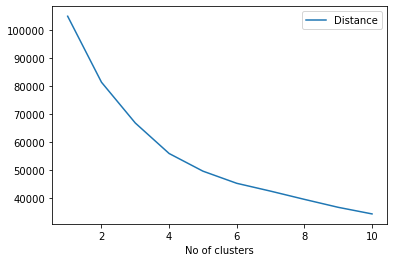

In [319]:
distance_df = distance_df.set_index('No of clusters')
distance_df.plot()

In [306]:
hierarchical_cluster = AgglomerativeClustering()

In [311]:
linkage_data = linkage(X_test1, method='complete', metric='euclidean')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [142.5, 142.5, 170.0, 170.0],
  [120.0, 120.0, 156.25, 156.25],
  [105.0, 105.0, 138.125, 138.125],
  [80.0, 80.0, 121.5625, 121.5625],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [215.0, 215.0, 233.75, 233.75],
  [192.5, 192.5, 224.375, 224.375],
  [100.78125, 100.78125, 208.4375, 208.4375],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  

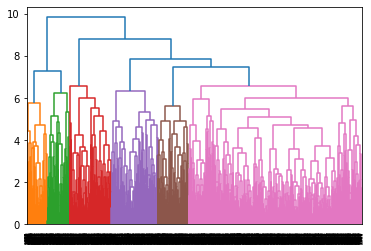

In [312]:
dendrogram(linkage_data)

In [353]:
for nclusters in range (2,20):
    hierarchical_cluster = AgglomerativeClustering(n_clusters = nclusters)
    h_pred = hierarchical_cluster.fit_predict(X_sample_pca)
    print(f'For K = {nclusters} Score = {silhouette_score(X_sample_pca, h_pred)}')

For K = 2 Score = 0.36487761924192325
For K = 3 Score = 0.30601673694388487
For K = 4 Score = 0.27647557472060036
For K = 5 Score = 0.2577357956253089
For K = 6 Score = 0.21705428489536016
For K = 7 Score = 0.22651902020037853
For K = 8 Score = 0.23441042586573527
For K = 9 Score = 0.2384060062888998
For K = 10 Score = 0.24099851349677537
For K = 11 Score = 0.2358080675064047
For K = 12 Score = 0.24765194012718425
For K = 13 Score = 0.2580295847618787
For K = 14 Score = 0.2660651996326048
For K = 15 Score = 0.2688122691186468
For K = 16 Score = 0.2726788948721634
For K = 17 Score = 0.2759268629511437
For K = 18 Score = 0.2753776036210812
For K = 19 Score = 0.26813581346864335


### MLP

In [395]:
hidden_layer_size = 10
activation = 'identity'
clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation=activation, random_state=1)
clf.fit(X_train,Y_train.values.ravel())

clf_pred=clf.predict(X_test)
clf.fit(X_train1,Y_train1.values.ravel())
clf_pred1=clf.predict(X_test1)

In [396]:
param_perc={'activation':['identity','logistic','tanh','relu'],'hidden_layer_size':[10,50,100,300]}

In [397]:
grid_pereptron=GridSearchCV(MLPClassifier(),param_perc,n_jobs = -1)

In [399]:
grid.fit(X_train1,Y_train1.values.ravel())

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'max_leaf_nodes': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [400]:
pcascore.append(accuracy_score(clf_pred,Y_test1))
tunepcascore.append(grid.best_score_)

In [360]:
print('Accuracy Score :',accuracy_score(clf_pred,Y_test))
print('Precision Score :',precision_score(clf_pred, Y_test, average='weighted'))
print('Recall score :',recall_score(clf_pred,Y_test, average='weighted'))
print('F1_Score :',f1_score(clf_pred, Y_test, average='weighted',zero_division=0))

Accuracy Score : 0.8073029645697759
Precision Score : 0.8077465291126875
Recall score : 0.8073029645697759
F1_Score : 0.8073473793957716


In [401]:
pcascore.append(accuracy_score(clf_pred1,Y_test1))

In [361]:
print('Accuracy Score :',accuracy_score(clf_pred1,Y_test1))
print('Precision Score :',precision_score(clf_pred1, Y_test1, average='weighted'))
print('Recall score :',recall_score(clf_pred1,Y_test1, average='weighted'))
print('F1_Score :',f1_score(clf_pred1, Y_test1, average='weighted',zero_division=0))

Accuracy Score : 0.7718727404193781
Precision Score : 0.7764213687965342
Recall score : 0.7718727404193781
F1_Score : 0.772417063901096


In [362]:
print("Grid Optimal parameters %s accuracy score of  %0.6f"% (grid.best_params_, grid.best_score_))

Grid Optimal parameters {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 47} accuracy score of  0.844592


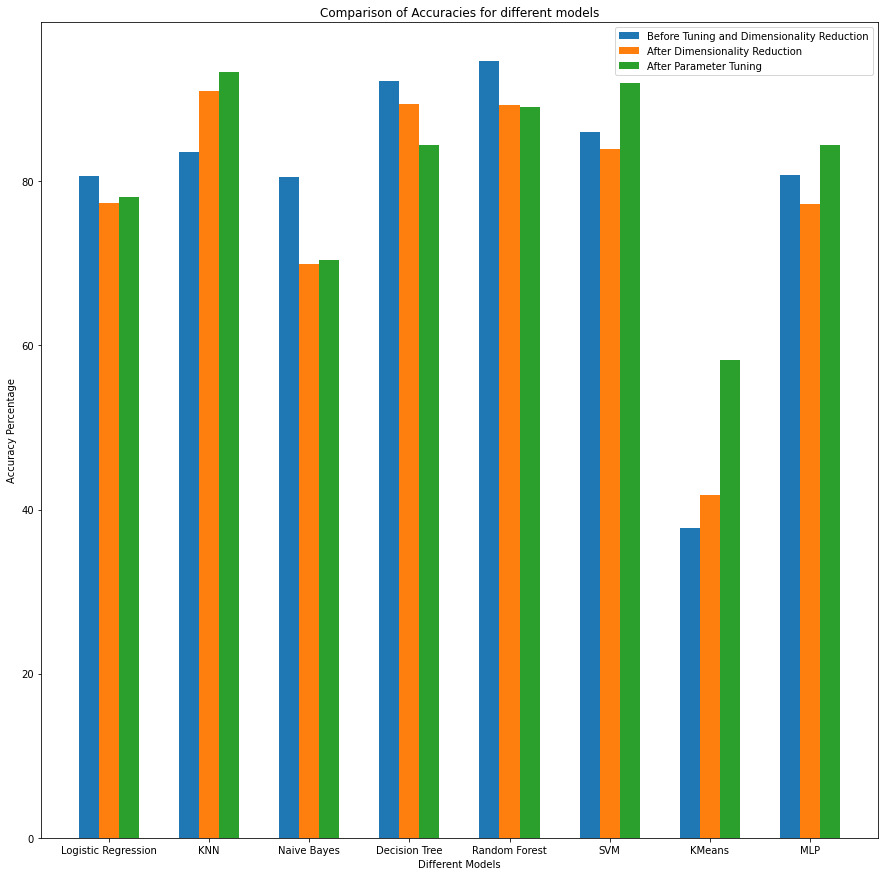

In [404]:
X = ['Logistic Regression','KNN','Naive Bayes','Decision Tree','Random Forest','SVM','KMeans','MLP']
before = np.array([0.8062,0.8358,0.8058,0.9222,0.9464,0.8604,0.3778,0.8073]) 
after_dr = np.array([0.7736,0.9099,0.6988,0.8940,0.8932,0.8391,0.4182,0.7718])
after_pt = np.array([0.7815,0.9337,0.7046,0.8445,0.8909,0.9200,0.5817,0.8445])

X_axis = np.arange(len(X))
plt.figure(figsize=(15,15))
plt.bar(X_axis-0.2, before*100, 0.2, label = 'Before Tuning and Dimensionality Reduction')
plt.bar(X_axis, after_dr*100, 0.2, label = 'After Dimensionality Reduction')
plt.bar(X_axis+0.2, after_pt*100, 0.2, label = 'After Parameter Tuning')

plt.xticks(X_axis, X)
plt.xlabel("Different Models")
plt.ylabel("Accuracy Percentage")
plt.title("Comparison of Accuracies for different models")
plt.legend()
plt.show()